

![SVG from www](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a2/Kühne_Logistics_University_logo_2019.svg/100px-Kühne_Logistics_University_logo_2019.svg.png)  
# Python Basics course September 2022  
### Kuehne Logistics University  

## Session 4: Introduction to data manipulation using the Numpy and Pandas library

In this session we will start with data manipulation with Python. Recall how in session 1 we briefly discussed the software framework that's often used by programmes written in Python. Central to functionality in Python are the Libraries. One of such library, which is the go-to one to do anything related to data manipulation is called Pandas. Besides the the quick introduction that we're giving you here, Pandas has innumerable number of methods that we won't be able to disucss here. The more extensive user guide however can be found [here](https://pandas.pydata.org/docs/user_guide/index.html#user-guide).

![](Figures/SoftwareLogic.png)



## The Pandas DataFrame

Central to working with Pandas is the format in which data is stored. This format is called `DataFrame`. You could compare this to storing data in an Excel spreadsheet. Namely, the way and the options of manipulations you have at your disposal, are the ones that Excel provides to you. Very similarly, a `DataFrame` allows you to manipulate data in a certain way. Another example of datatype-based methods in Python are the `String` methods, discussed in Session 2. 

![](Figures/DF_Example.png)

Before doing anything, we have to load the Pandas libraries into our kernel. This is done with the `import` statement. The `as` statement assigns an abbreviation to the name of the library. That way,we don't have to type the full name before calling a method from that particular library. 



In [1]:
import pandas as pd

The easy way to construct a DataFrame is to "feed" it with a `dictionary`. A dictionary is a Python-native way of storing data. A dictionary is initiated as follows: 
`{index:data}`. In the example below, we saved data on the brand, model and production years of a car. This can then be accessed through the index name.

__Note:__ we can assign different types of data in one dictionary

In [ ]:
thisdict = {
  "brand": "Ford",
  "model": "Mustang",
  "year": [1964,1965,1966]
}
print(thisdict["brand"]) # Printing the brand name
print(thisdict["year"]) # Printing the LIST of years of production

Now, getting back to the constructing a `DataFrame`. One is constructed by calling the method `pandas.DataFrame()`. (In this case it's called with `pd.DataFrame()`, because we abbreviated Pandas with pd with the `as` statement). 

In [ ]:
# Construct a dictionary 
cars = {'Brand': ['Honda', 'Toyota', 'Ford', 'Audi','Honda','Audi'], 'Price': [22000, 25000, 27000, 35000,30000,10000]}

# Make it into a DataFrame
df = pd.DataFrame(cars)

# Display the DataFrame
df

We can also tell it to only select the data with the index name `Price`. 

In [ ]:
df = pd.DataFrame(cars, columns = ['Price'])

df

The `.describe()` method gives a small summary for each of the numeric columns. 

In [ ]:
df = pd.DataFrame(cars)
df['Price'].describe()

We can also add a column, simply as follows: 

__Note__: the added column has to be the same length as the DataFrame to which it is added. 

In [ ]:
df['Color'] = ['green', 'blue', 'green', 'red','black','yellow']
df

### Selecting columns and rows
A selection for a column can be made by subselecting the name of the column as follows:

In [ ]:
df["Brand"]

Then we can select one entry based on the index value:

In [ ]:
df["Brand"][0]

Note that this does not work for the "whole" DataFrame.To do so, we need the `.loc` argument, using as follows:

In [ ]:
df.loc[0,"Brand"]

We can also approach the DataFrame as a "simple" matrix, from which we select a row and a column, using the `.iloc[row,column]` statement. Recall how we can select data entries from a list. Now, we have to do it in two dimensions, due to the matrix shape of a DataFrame.
![](Figures/hello.png)

In [ ]:
df.iloc[0,0]

Subsequently, for a list we can use the `:`, as follows:

In [ ]:
df.iloc[0:2,0:3]

In order to __save__ a subset of a DataFrame we want to work further with, we have to assign a new variable name (or overwrite). 

In [ ]:
subset = df.iloc[0:2,0:3]
subset

### Working with Pokedata
Practically, we would like work with datasets that we don't create ourselves, but acquire externally. For the examples, we acquire a dataset from the following GitHub
https://github.com/KeithGalli/pandas

With all kinds of information about Pokémons. The information is stored in a "comma-separated values" file (.csv). This a very common smaller and bigger datasets. 

First, we start with loading the data using the `pandas.read_csv()` method. The input is a string with the location of the data file. This can be retrieved using the command `%pwd`, which returns the address of the so-called working directory. 

In [ ]:
%pwd

In [ ]:
## Larger datasets: Pokemons 
pwd = %pwd
#poke_data = pd.read_csv(pwd+"\\pokemon_data.csv")
poke_data = pd.read_csv(pwd+"/pokemon_data.csv")

Using the `.head()` and `.tail()` functions yields us an easy initial exploreation of the first and last rows of our dataset

In [ ]:
poke_data.head(4)

In [ ]:
poke_data.tail(5)

The `len()` method can be used to see the number of rows of a dataset

In [ ]:
len(poke_data)

And, again, the `.describe()` method to see a brief description of our columns with numeric data. 

In [ ]:
poke_data.describe()

### Selecting data

Besides the examples that were given with the small dataset about cars, we also have more sophisticated ways of selecting the data, based on the information _in_ the data itself. The basis of this is a list of Boolean (recall: `True` or `False`), representing whether we want to select something, or not. 

Taking the small example of comparing the Name column in the dataset with the name of one Pokémon Bulbasaur. This yields a list of Booleans, with a `True` on the 0th index. 

In [ ]:
poke_data['Name']=='Bulbasaur'

If we select the 0th row from the dataset we indeed find Bulbasaur. 

In [ ]:
poke_data.iloc[0]

Knowing this, we can also select a subset for Grass Pokémons as follows:

In [ ]:
poke_data[poke_data['Type 1']=='Grass']

### Organising data
DataFrames also have various methods to organise the data. Two examples that we discuss here are the `.sort_values()` and the `.groupby()` methods. 

In [ ]:
poke_data.sort_values(['HP'])

In [ ]:
poke_data.groupby(['Generation']).sum()

In [ ]:
poke_data.groupby(['Generation']).count()

### Learning from the data
There's many functionality in Pandas that allow us to make general statements about the dataset that would be very difficult to do manually. 

In [ ]:
print("The mean is ", poke_data['HP'].mean() )
print("The min is ", poke_data['HP'].min() )
print("The max is ", poke_data['HP'].max() )

In [ ]:
gen1_grass = poke_data[ (poke_data['Type 1'] == 'Grass') & (poke_data['Generation'] == 1) ]
gen5_grass = poke_data[ (poke_data['Type 1'] == 'Grass') & (poke_data['Generation'] == 5) ]

print(len(gen1_grass),"grass pokemons in gen 1\n",len(gen5_grass),"grass pokemons in gen 5")

In [ ]:
# Strong pokemons
strong_pokemons = poke_data[poke_data['HP'] > 50]
print("There are ",len(strong_pokemons), " strong pokemons")

In [ ]:
# Identifying the strongest pokemon
maxHP = poke_data['HP'].max() # Max HP value
strongest_pokemon = poke_data[poke_data['HP'] == maxHP] # Equal the max HP value to a row
print("Strongest pokemon is : ",strongest_pokemon["Name"]) # Print the name of the strongest Pokemon 

The `.groupby()` method is a powerful method that allows you to group data entries based on certain properties. In this case, we can can for example get the mean and summed HP for every Type 1 Pokemon. The `.count()` method counts the number of data entries that each category contains. 

In [ ]:
# Groupby mean 
poke_data.groupby(['Type 1']).mean()

In [ ]:
# Groupby sum 
poke_data.groupby(['Type 1']).sum()

In [ ]:
# Groupby count
poke_data.groupby(['Type 1']).count()

### Simple visualisation

Besides the aforementioned methods, a DataFrame also has the possibility to be visualised in a simple manner by the `.plot()` method. All options are listed [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html). 

By default, a line is plotted, but many more options are possible: 

* ‘line’ : line plot (default)
* ‘bar’ : vertical bar plot
* ‘barh’ : horizontal bar plot
* ‘hist’ : histogram
* ‘box’ : boxplot
* ‘kde’ : Kernel Density Estimation plot
* ‘density’ : same as ‘kde’
* ‘area’ : area plot

In [ ]:
mean_type1 = poke_data.groupby(['Type 1']).mean()
mean_type1['HP'].plot(kind='line');

In [ ]:
# And a little more readable
mean_type1['HP'].plot(kind='bar',title="HP per Type 1",ylabel='HP points');

## Exercises on the sample sales dataset

* First load in the dataset "SampleSales.csv", located in the working directory.

* How many individual customers do we have? 
* How many orders did we have in Miami? 

* How much profit did we make in the West region? 
* How much profit did we make in total? 
* How much profit did we make, besides California? 
* Make a table-wise overview of the profit per state. 

* What is the most profitable order?

Think about the labels for the x and y-axis and titles!
* Visualise the turnover for each region using a barplot 

In [3]:
pwd = %pwd
sales_data = pd.read_csv(pwd+"/SampleSales.csv")

In [ ]:
len(sales_data['Customer ID'].unique())

In [ ]:
west = sales_data[sales_data['Region']=='West']
west['Profit'].sum()

In [ ]:
sales_data['Profit'].sum()

In [ ]:
west = sales_data[sales_data['State']!='California']
west['Profit'].sum()

In [ ]:
sales_data.groupby(['State']).sum()

In [ ]:
sales_data['Profit'].max()

In [ ]:
mean_type1 = sales_data.groupby(['Region']).sum()
mean_type1['Sales'].plot(kind='bar',title="Region",ylabel='Sales');

## Extra exercises
Hint: Use Google!

* How much profit did we make, on average, per unit for each customer? (Hint: use the profit, customer ID/name and Quantity columns)

* What percentage of profit did we "lose" on discount for Furniture in 2015 (user order date)? Hint: DateTime is automatically recognised and can be compared as strings. E.g. 01\03\2016>01\06\2017 results in False.

* Visualise the profit for both the consumer and corporate segment using a boxplot

* The SampleSales dataset contains a column "Row ID". Try to load the dataset without this column. 

In [4]:
df = sales_data.groupby(['Customer ID']).sum(numeric_only=True)
df['Profit per Unit'] = df['Profit']/df['Quantity']
df

,Row ID,Postal Code,Sales,Quantity,Discount,Profit,Profit per Unit
Customer ID,,,,,,,
AA-10315,43823,727845,5563.560,30,1.00,-362.8825,-12.096083
AA-10375,60900,664413,1056.390,41,1.20,277.3824,6.765424
AA-10480,55548,604689,1790.512,36,0.20,435.8274,12.106317
AA-10645,109566,911792,5086.935,64,1.15,857.8033,13.403177
AB-10015,40717,516566,886.156,13,0.40,129.3465,9.949731
...,...,...,...,...,...,...,...
XP-21865,156468,1781278,2374.658,100,1.30,621.2300,6.212300
YC-21895,28839,461734,5454.350,31,0.60,1305.6290,42.117065
YS-21880,70256,812394,6720.444,58,0.60,1778.2923,30.660212


In [5]:
import datetime
sales_data['Order Date'] = pd.to_datetime(sales_data['Order Date'])
df = sales_data[ (sales_data['Order Date'] > '2015-01-01') & (sales_data['Order Date'] < '2016-01-01')]
discount = df[df['Discount']!=0]
percentage = discount['Profit'].sum()/ df['Profit'].sum()
percentage

-0.11769421026332019

<AxesSubplot:title={'center':'Profit'}, xlabel='Segment'>

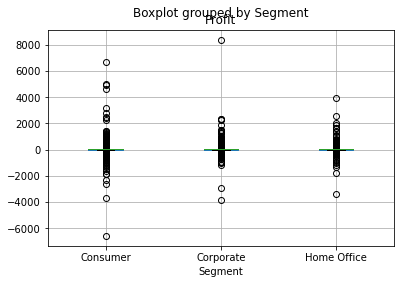

In [7]:
sales_data.boxplot(column = 'Profit', by = 'Segment', showfliers=True)

In [8]:
cols = list(pd.read_csv(pwd+"/SampleSales.csv", nrows=1))
withoutrowid = pd.read_csv(pwd+"/SampleSales.csv", usecols =[i for i in cols if i != 'Row ID'])
withoutrowid

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,CA-2014-110422,1/21/2014,1/23/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,Florida,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028
9990,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0.00,15.6332
9991,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,0.20,19.3932
9992,CA-2017-121258,2/26/2017,3/3/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,California,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0.00,13.3200
